In [2]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline

sys.path.append('..')
sys.path.append('../src_cython')
from zwatershed import zwatershed_and_metrics
from z_watershed import *
from visualization.visualize_funcs import *

path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'

start = time.clock()
threshes = [2000]
hdf5_gt_file = path_to_data + 'groundtruth_seg_thick.h5'  # /groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_pred_file = path_to_data + 'tstvol-1_2.h5'  # /tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
out = path_to_data + 'out/'  # '/groups/turaga/home/singhc/evaluation/out/'
save_threshes = threshes
rand = 0
p1, p2, p3 = 200,200,200# 215, 214, 214

hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]], dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]], dtype='float32')
print 'gt,aff shapes',gt.shape,aff.shape
aff = aff[:, p1:(-1 * p1), p2:(-1 * p2), p3:(-1 * p3)]
gt = trim_arbitrary_aff(gt, aff)
print 'gt,aff shapes',gt.shape,aff.shape

nhood = mknhood3d(1)
node1, node2, edge_affs = affgraph_to_edgelist(aff, nhood)
print "len node1", len(node1)
print "n1,n2,edge", min(node1), max(node1), min(node2), max(node2), min(edge_affs), max(edge_affs)
print "\noriginal watershed..."
seg_one, segs_old, rand = zwatershed_and_metrics(gt, aff, threshes, save_threshes)

print "\nnew watershed..."
segs_new = zwatershed_and_metrics_edge(gt, np.array(node1, dtype='uint32'), np.array(node2, dtype='uint32'),
                                       np.array(edge_affs), threshes, save_threshes)

print rand
print "time: ", time.clock() - start

gt,aff shapes (520, 520, 520) (3, 432, 432, 432)
gt,aff shapes (32, 32, 32) (3, 32, 32, 32)
len node1 95229
n1,n2,edge 2 32767 1 32766 9.4206e-07 1.0

original watershed...

new watershed...
[1025 1026 1027 1028 1029 1030 1031 1032 1033 1034] [ 1  2  3  4  5  6  7  8  9 10] [ 0.99999464  0.9999944   0.99999571  0.99999774  0.99999857  0.99999881
  0.99999905  0.9999994   0.99999952  0.99999952]
{'seg': array([    0,     2,     2, ..., 27643, 29694, 29695], dtype=uint32), 'counts': array([0], dtype=uint32), 'rg': array([], shape=(0, 3), dtype=float32)}
{'V_Rand_merge': [0.9997636061550127], 'V_Rand_split': [0.9882149133292448], 'V_Rand': 0.993955715037124}
time:  9.797122


In [3]:
## Open training data and labels
data_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/data/'# 'nobackup/turaga/data/FlyEM/fibsem_medulla_7col/tstvol-520-1/'
os.chdir('/.')
f = h5py.File(data_folder + 'im_uint8.h5', 'r')
im = f[f.keys()[0]] # was 'main'
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g[g.keys()[0]],dtype='float32') #3,z,y,x - was 'main'
label_set = np.transpose(label_set,(1,2,3,0))

(520, 520, 520) (520, 520, 520, 3) (32, 32, 32)
(32, 32, 32) (32, 32, 32, 3) (32, 32, 32)
old num 761 new num 2027


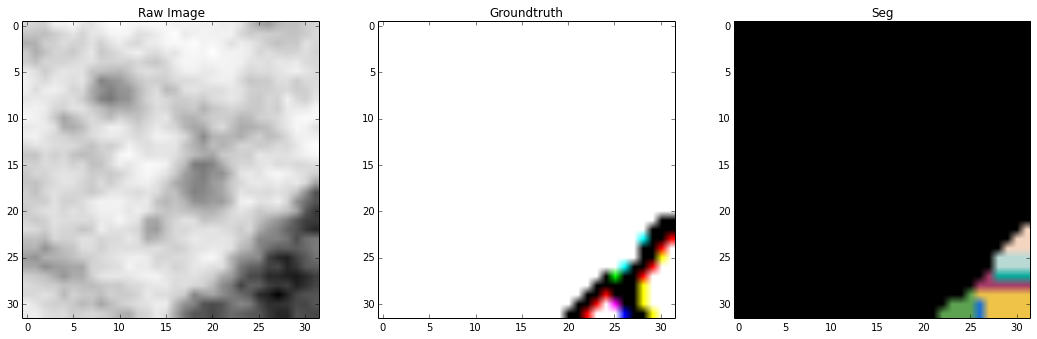

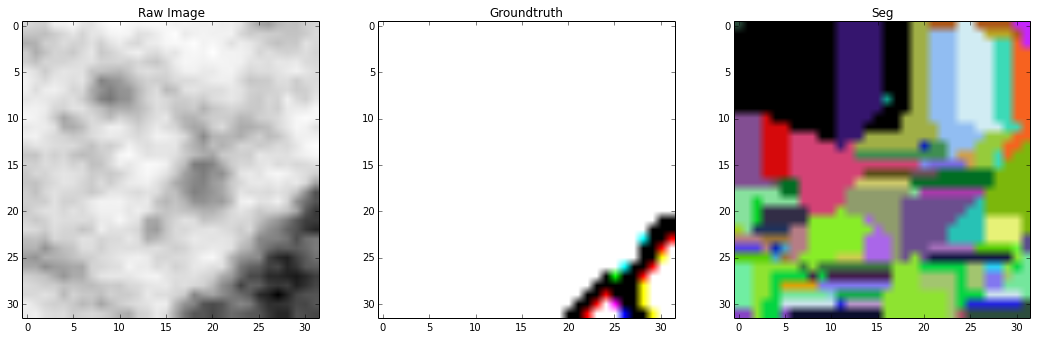

In [4]:
# view segs
seg_old = seg_one
seg_new = segs_new[0]
# im,label_set=trim(im,label_set,seg) 
# seg = seg.transpose((2, 1, 0)).reshape(shape).transpose((2, 1, 0))
print im.shape,label_set.shape,seg_new.shape
im,label_set=trim_arbitrary(im,label_set,seg_new) 
print im.shape,label_set.shape,seg_new.shape
print "old num",len(np.unique(seg_old)),"new num",len(np.unique(seg_new))
# display_seg(im, label_set, seg, im_size=label_set.shape[0], im2_size=seg.shape[0])
display_arbitrary_seg(im, label_set, seg_old)
display_arbitrary_seg(im, label_set, seg_new)

In [20]:
print seg_new
print seg_old

[[[ 0  1  2  3]
  [20  5  6  7]
  [24  9 10 11]
  [28 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]]
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


In [21]:
print node1, node2, edge_affs

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  5  6  7  8  9 10 11 12 13 14
 15 20 21 22 23 24 25 26 27 28 29 30 31  2  3  5  6  7  9 10 11 13 14 15 17
 18 19 21 22 23 25 26 27 29 30 31] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  1  2  3  4  5  6  7  8  9 10
 11 16 17 18 19 20 21 22 23 24 25 26 27  1  2  4  5  6  8  9 10 12 13 14 16
 17 18 20 21 22 24 25 26 28 29 30] [ 0.99995029  0.99998677  0.99999285  0.99982649  0.9999404   0.9999814
  0.99999022  0.99982977  0.99992788  0.99997401  0.99998486  0.99984777
  0.99992263  0.9999665   0.99997699  0.99999559  0.99999857  0.99999917
  0.99998748  0.99999559  0.99999845  0.99999917  0.99998605  0.99999464
  0.99999809  0.99999893  0.99997532  0.99999285  0.99999809  0.99999905
  0.99997497  0.9999913   0.99999738  0.99999845  0.99997652  0.99999034
  0.99999654  0.99999785  0.99999952  0.99999976  0.99999809  0.99999952
  0.99999976  0.99999797  0.9999994   0.99999976  0.99999738  0.99999917
  0.99999964  0.99999762  0.99999952  0.999